In [8]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
from Madule import plots
import arviz as az
from scipy import stats

In [10]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
simNumber = 3
# Directory of simulated data
parent_dir  = '/mnt/scratch/projects/7TPD/amin/realdata'
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{parent_dir}/{str(simNumber)}/{partcipant_group}/HierRL_dual_twoLR_1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
#log_lik = fit_HC['log_lik']

An exception occurred


TypeError: 'NoneType' object is not subscriptable

In [248]:
summary = az.summary(fit)

In [257]:
summary['r_hat']

hier_alphaAct_pos_mu[0, 0]            1.0
hier_alphaAct_pos_mu[0, 1]            1.0
hier_alphaAct_pos_mu[1, 0]            1.0
hier_alphaAct_pos_mu[1, 1]            1.0
hier_alphaAct_neg_mu[0, 0]            1.0
                                     ... 
transfer_hier_weight_mu[1, 1]         1.0
transfer_hier_sensitivity_mu[0, 0]    1.0
transfer_hier_sensitivity_mu[0, 1]    1.0
transfer_hier_sensitivity_mu[1, 0]    1.0
transfer_hier_sensitivity_mu[1, 1]    1.0
Name: r_hat, Length: 9279, dtype: float64

In [11]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
#log_lik = fit_HC['log_lik']


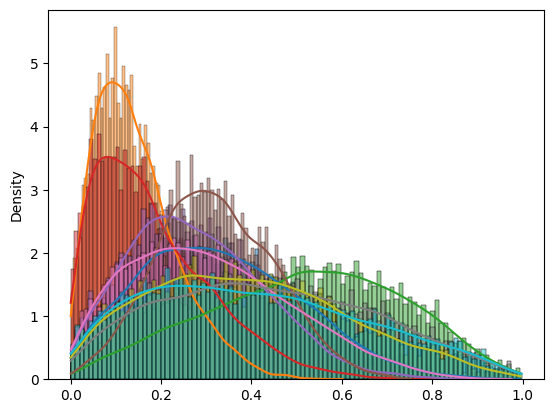

In [278]:
transfer_weight = fit['transfer_weight']
for i in range(10):
    sns.histplot(transfer_weight[i, 1, 1], kde=True, stat='density', bins=100) 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0')])

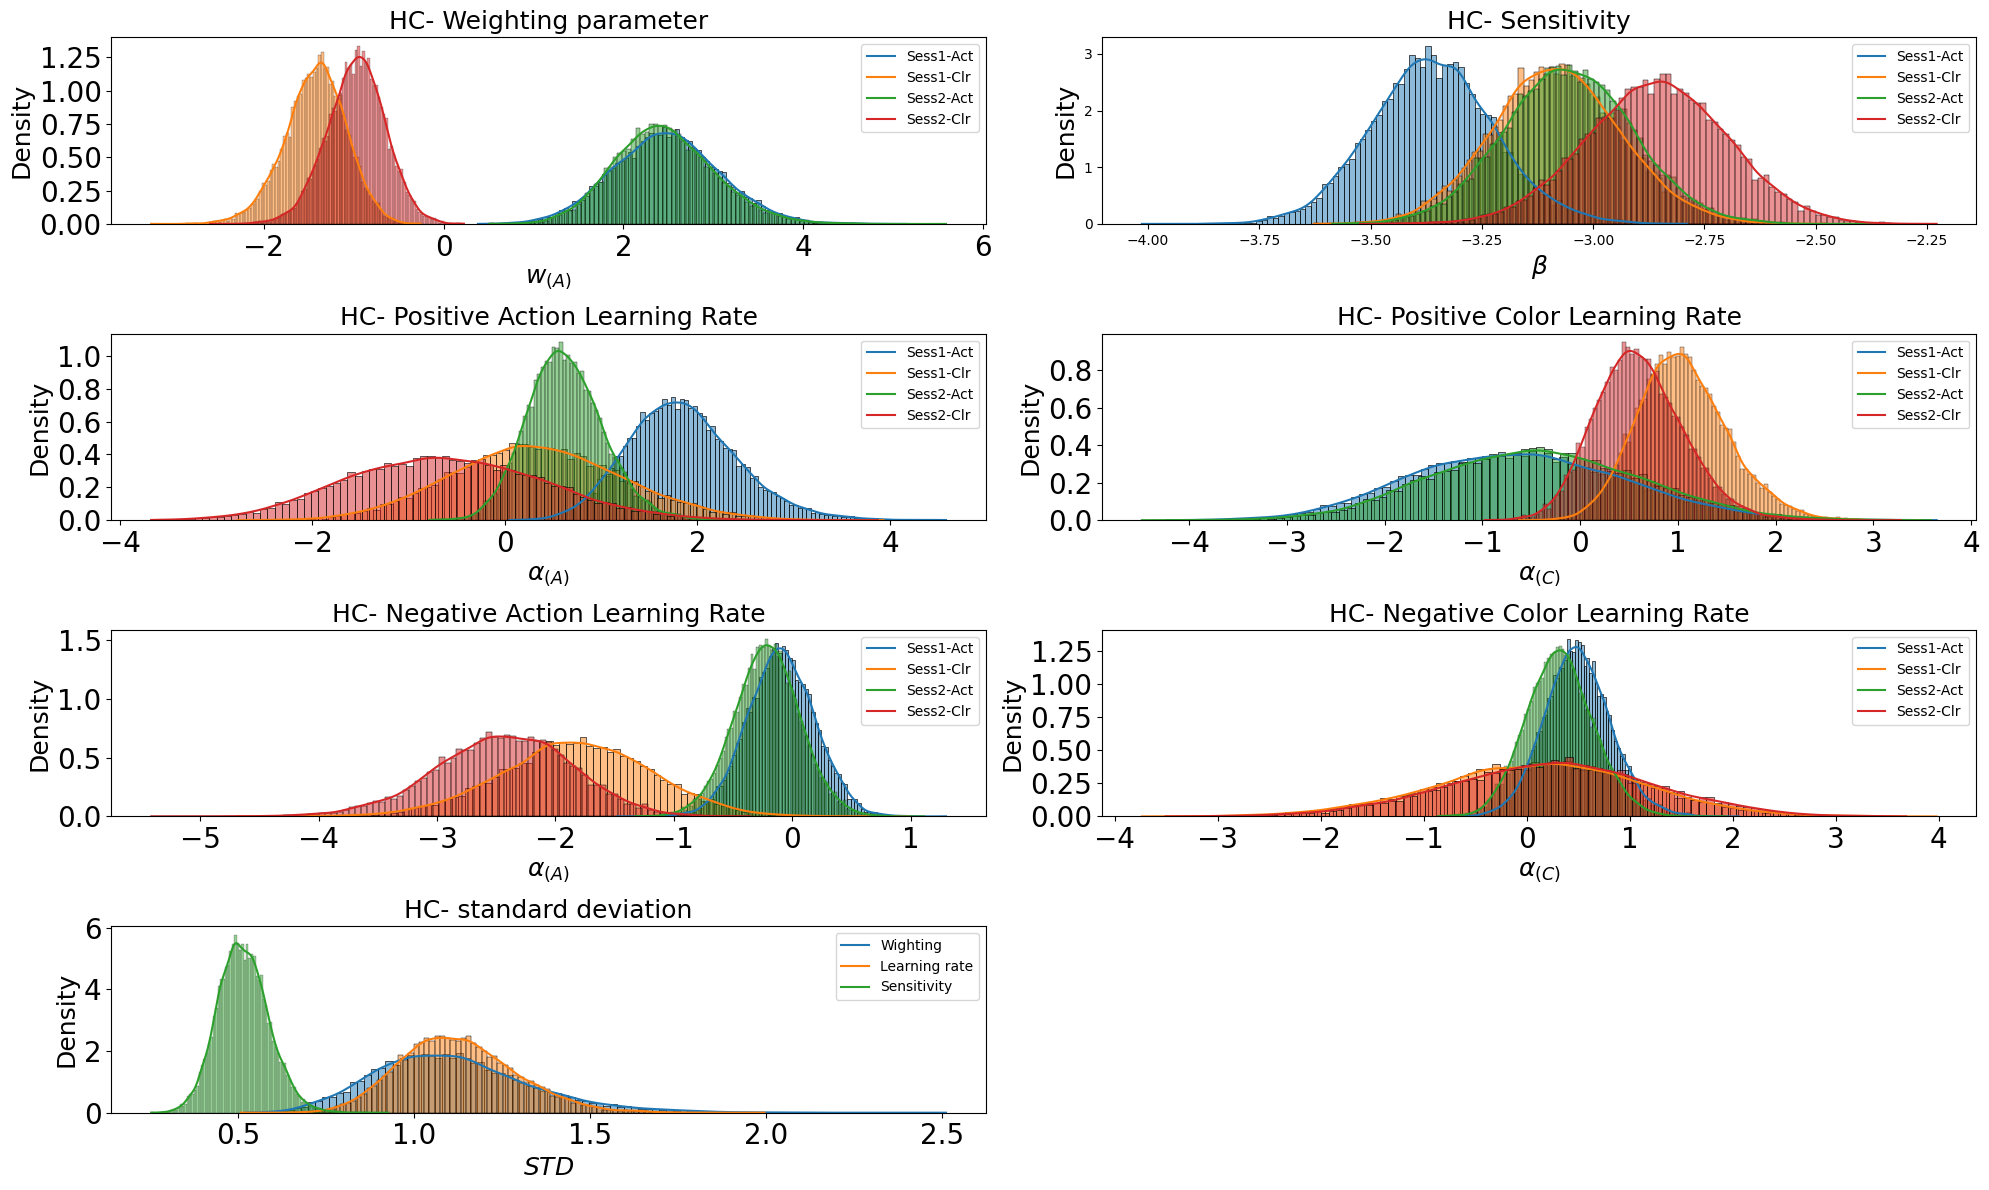

In [12]:
# Extracting posterior distributions for each of four main unkhown parameters
estimated_hier_alphaAct_pos_mu = fit["hier_alphaAct_pos_mu"] 
estimated_hier_alphaAct_neg_mu = fit["hier_alphaAct_neg_mu"] 
estimated_hier_alphaClr_pos_mu = fit["hier_alphaClr_pos_mu"] 
estimated_hier_alphaClr_neg_mu = fit["hier_alphaClr_neg_mu"] 
estimated_hier_weight_mu = fit["hier_weight_mu"] 
estimated_hier_sensitivity_mu = fit["hier_sensitivity_mu"]
estimated_hier_alpha_sd = fit['hier_alpha_sd'].flatten()
estimated_hier_weight_sd = fit['hier_weight_sd'].flatten()
estimated_hier_sensitivity_sd = fit['hier_sensitivity_sd'].flatten()

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 12), tight_layout=True)
rows = 4
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(estimated_hier_weight_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(estimated_hier_sensitivity_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(estimated_hier_alphaAct_pos_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Positive Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(estimated_hier_alphaClr_pos_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Positive Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 5)
sns.histplot(estimated_hier_alphaAct_neg_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Negative Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 6)
sns.histplot(estimated_hier_alphaClr_neg_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[1,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[0,0], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Negative Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



# Action Learning Rate
fig.add_subplot(rows, columns, 7)
sns.histplot(estimated_hier_weight_sd, kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alpha_sd, kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_sd, kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- standard deviation',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$STD$',  fontsize=18)
plt.legend(['Wighting', 'Learning rate', 'Sensitivity']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

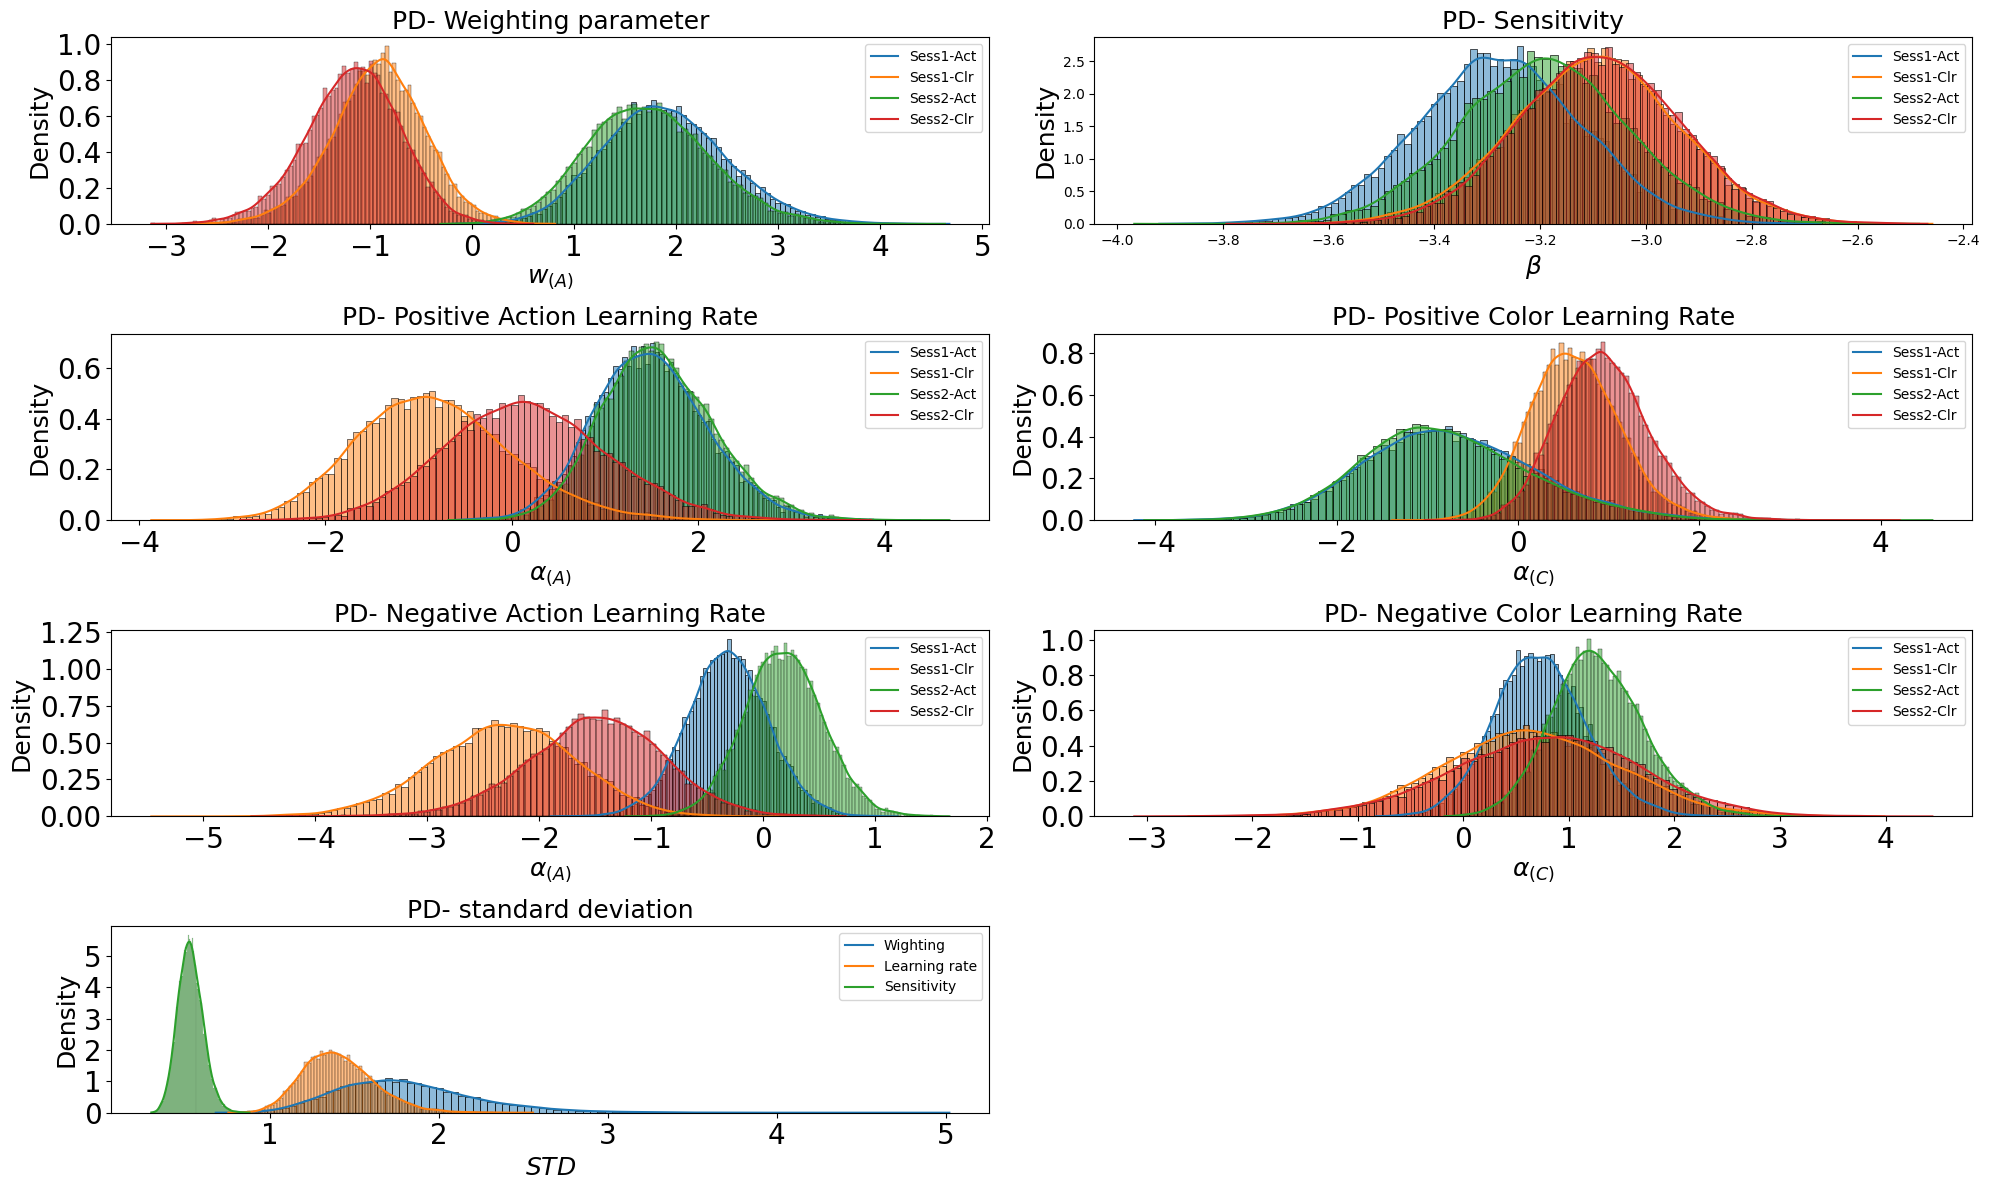

In [292]:
# Extracting posterior distributions for each of four main unkhown parameters
estimated_hier_alphaAct_pos_mu = fit["hier_alphaAct_pos_mu"] 
estimated_hier_alphaAct_neg_mu = fit["hier_alphaAct_neg_mu"] 
estimated_hier_alphaClr_pos_mu = fit["hier_alphaClr_pos_mu"] 
estimated_hier_alphaClr_neg_mu = fit["hier_alphaClr_neg_mu"] 
estimated_hier_weight_mu = fit["hier_weight_mu"] 
estimated_hier_sensitivity_mu = fit["hier_sensitivity_mu"]
estimated_hier_alpha_sd = fit['hier_alpha_sd'].flatten()
estimated_hier_weight_sd = fit['hier_weight_sd'].flatten()
estimated_hier_sensitivity_sd = fit['hier_sensitivity_sd'].flatten()

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 12), tight_layout=True)
rows = 4
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(estimated_hier_weight_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_weight_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(estimated_hier_sensitivity_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(estimated_hier_alphaAct_pos_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_pos_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Positive Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(estimated_hier_alphaClr_pos_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_pos_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Positive Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 5)
sns.histplot(estimated_hier_alphaAct_neg_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaAct_neg_mu[1,1], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Negative Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


# Action Learning Rate
fig.add_subplot(rows, columns, 6)
sns.histplot(estimated_hier_alphaClr_neg_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[1,1], kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alphaClr_neg_mu[0,0], kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- Negative Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



# Action Learning Rate
fig.add_subplot(rows, columns, 7)
sns.histplot(estimated_hier_weight_sd, kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_alpha_sd, kde=True, stat='density', bins=100)
sns.histplot(estimated_hier_sensitivity_sd, kde=True, stat='density', bins=100)
plt.title(f'{partcipant_group}- standard deviation',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$STD$',  fontsize=18)
plt.legend(['Wighting', 'Learning rate', 'Sensitivity']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


(0.0, 1.0)

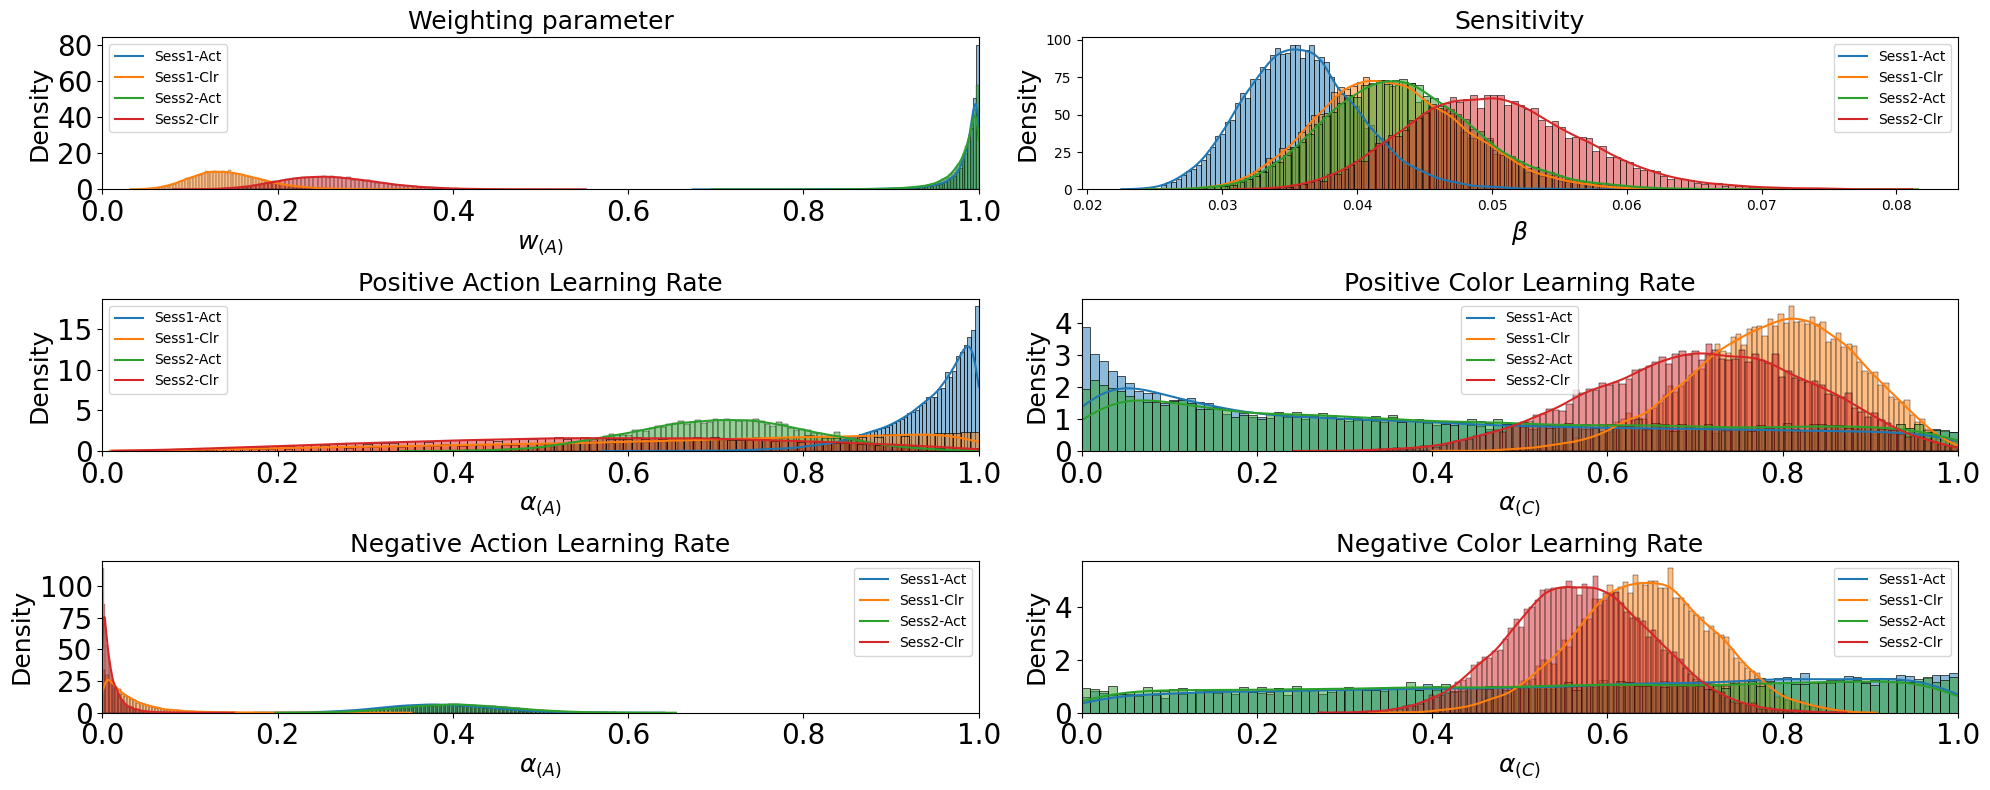

In [287]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos = fit["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg = fit["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos = fit["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg = fit["transfer_hier_alphaClr_neg_mu"] 
weight = fit["transfer_hier_weight_mu"] 
beta = fit["transfer_hier_sensitivity_mu"]
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 8), tight_layout=True)
rows = 3
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.xlim(0, 1)
# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(beta[0,0], kde=True, stat='density', bins=100)
sns.histplot(beta[0,1], kde=True, stat='density', bins=100)
sns.histplot(beta[1,0], kde=True, stat='density', bins=100)
sns.histplot(beta[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 

# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(alphaAct_pos[0,0], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_pos[0,1], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_pos[1,0], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_pos[1,1], kde=True, stat='density', bins=100)
plt.title('Positive Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Action Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(alphaClr_pos[0,0], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_pos[0,1], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_pos[1,0], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_pos[1,1], kde=True, stat='density', bins=100)
plt.title('Positive Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Action Learning Rate
fig.add_subplot(rows, columns, 5)
sns.histplot(alphaAct_neg[0,0], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_neg[0,1], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_neg[1,0], kde=True, stat='density', bins=100)
sns.histplot(alphaAct_neg[1,1], kde=True, stat='density', bins=100)
plt.title('Negative Action Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(A)} $',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Action Learning Rate
fig.add_subplot(rows, columns, 6)
sns.histplot(alphaClr_neg[0,0], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_neg[0,1], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_neg[1,0], kde=True, stat='density', bins=100)
sns.histplot(alphaClr_neg[1,1], kde=True, stat='density', bins=100)
plt.title('Negative Color Learning Rate',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$ \alpha_{(C)} $',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

<Axes: ylabel='Density'>

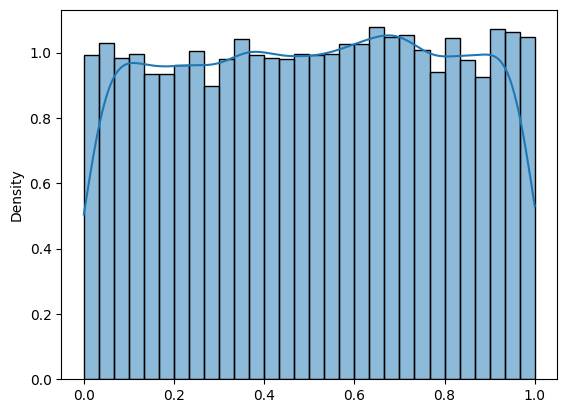

In [244]:
import scipy
sns.histplot(stats.norm.cdf(np.random.normal(0,1, size=10000)), stat='density', kde=True, bins=30)

In [263]:
stats.norm.cdf(-3)

0.0013498980316300933

<Axes: ylabel='Count'>

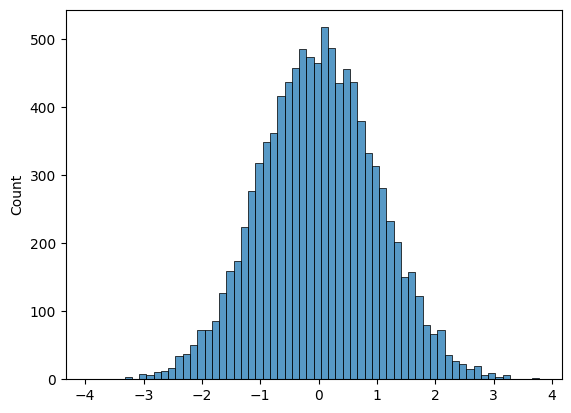

In [208]:
sns.histplot(stats.norm.cdf(estimated_hier_weight_mu[1,1]))

<Axes: ylabel='Count'>

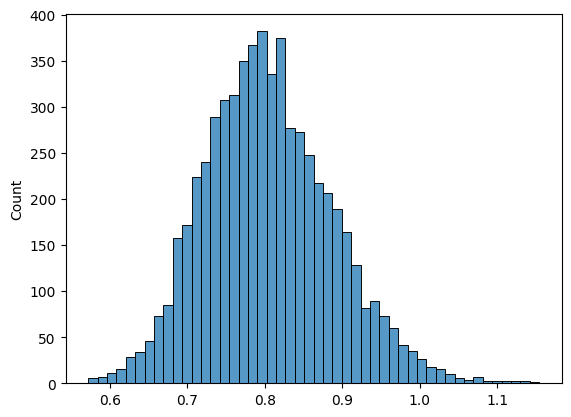

In [258]:
sns.histplot(fit['hier_sensitivity_sd'].flatten())

<Axes: ylabel='Density'>

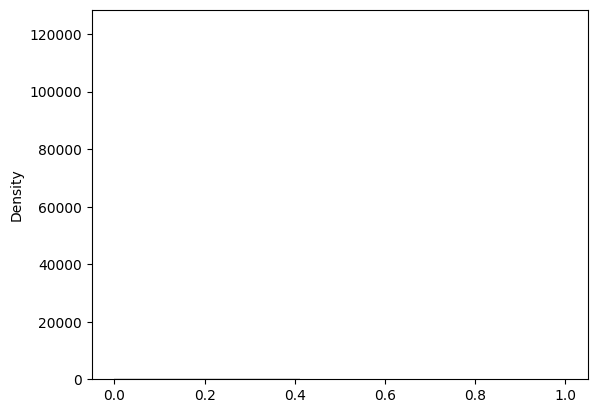

In [173]:
sns.histplot(stats.norm.cdf(estimated_hier_weight_mu[0,0]))
sns.histplot(stats.norm.cdf(estimated_hier_weight_mu[0,1]))
sns.histplot(stats.norm.cdf(estimated_hier_weight_mu[1,0]))
sns.histplot(stats.norm.cdf(estimated_hier_weight_mu[1,1]))

<Axes: ylabel='Count'>

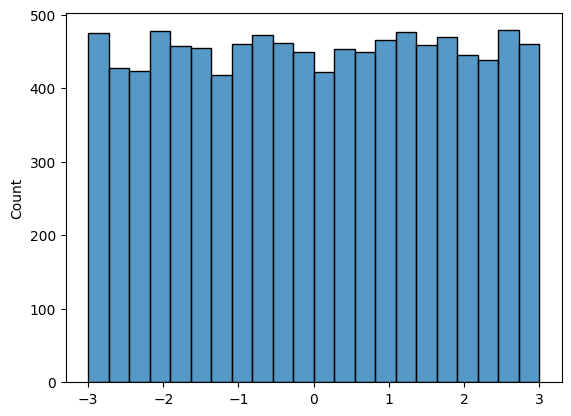

In [139]:
sns.histplot(np.random.uniform(-3,3, size=10000))

In [24]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
behAll = behAll[behAll['patient']=='HC']
sublist = behAll['sub_ID'].unique()

In [ ]:
session1 = ['sub-030', 'sub-036', 'sub-069']
session2 = ['sub-030','sub-067' ,'sub-069', 'sub-076', 'sub-077', 'sub-083'] # worse one 'sub-076', 'sub-083'

<Axes: ylabel='Density'>

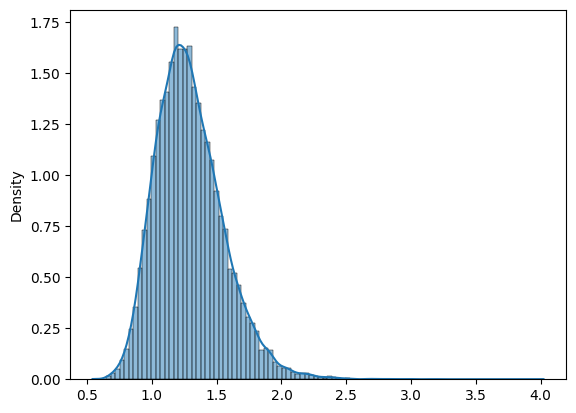

In [84]:
sns.histplot(fit['hier_weight_sd'].flatten(), kde=True, stat='density', bins=100)


<Axes: ylabel='Density'>

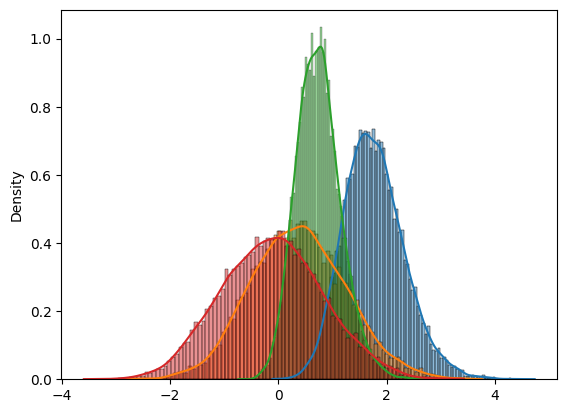

In [77]:
sns.histplot(fit['hier_alphaAct_pos_mu'][0,0], kde=True, stat='density', bins=100)
sns.histplot(fit['hier_alphaAct_pos_mu'][0,1], kde=True, stat='density', bins=100)
sns.histplot(fit['hier_alphaAct_pos_mu'][1,0], kde=True, stat='density', bins=100)
sns.histplot(fit['hier_alphaAct_pos_mu'][1,1], kde=True, stat='density', bins=100)

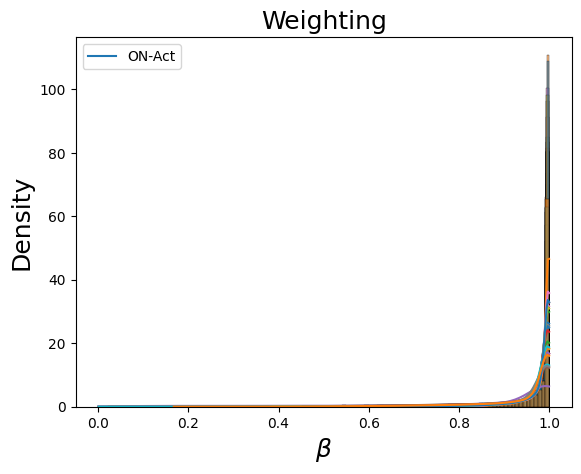

In [20]:
transfer_weight = fit['transfer_weight']

for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,1,0], kde=True, stat='density', bins=100)       
plt.title('Weighting',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['ON-Act']) 

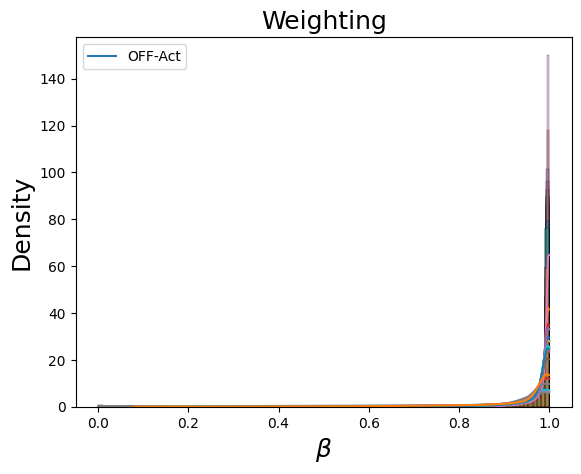

In [21]:
transfer_weight = fit['transfer_weight']


for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,0,0], kde=True, stat='density', bins=100)       
plt.title('Weighting',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act']) 

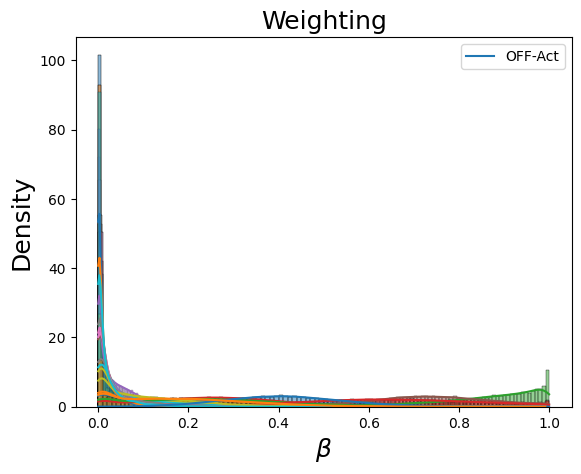

In [22]:
transfer_weight = fit['transfer_weight']


for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,0,1], kde=True, stat='density', bins=100)       
plt.title('Weighting',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act']) 

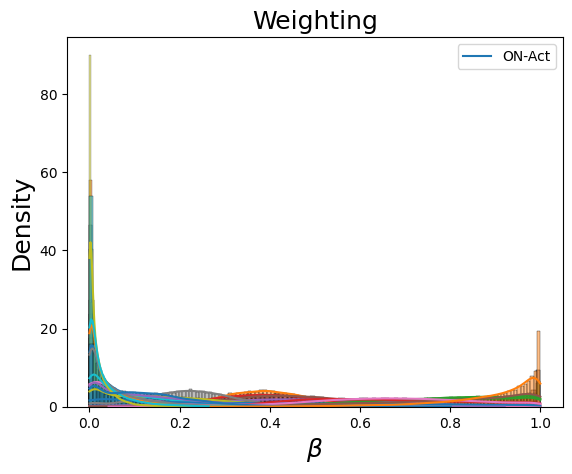

In [23]:
transfer_weight = fit['transfer_weight']


for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,1,1], kde=True, stat='density', bins=100)       
plt.title('Weighting',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['ON-Act']) 

<Axes: ylabel='Density'>

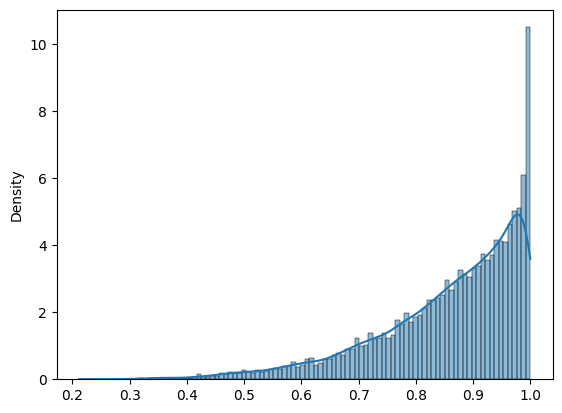

In [61]:
transfer_weight = fit['transfer_weight']


sns.histplot(transfer_weight[2,0,1], kde=True, stat='density', bins=100)       


In [59]:
list(sublist).index(session1[2])

13

In [ ]:
transfer_weight = fit['transfer_weight']

sns.histplot(transfer_weight[0,0], kde=True, stat='density', bins=100)
sns.histplot(transfer_weight[0,1], kde=True, stat='density', bins=100)
sns.histplot(transfer_weight[1,0], kde=True, stat='density', bins=100)
sns.histplot(transfer_weight[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
if partcipant_group=='HC':
    plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
else:
    plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 

<Axes: ylabel='Density'>

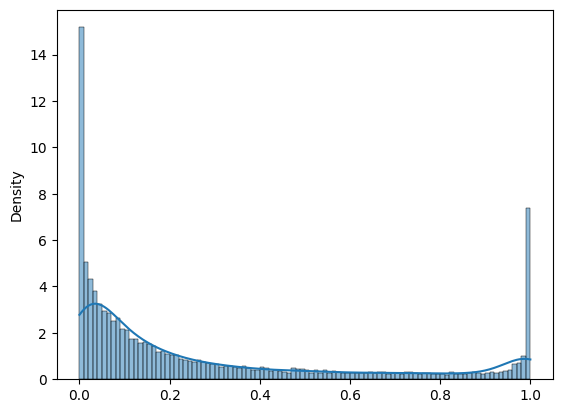

In [54]:
sns.histplot(transfer_weight[3,0,0,:], kde=True, stat='density', bins=100)


- eliminate X70767, sub-040 in PD group, for having large no responses and 
D3: had to restart NA_noise, because of key press on noise. Was a bit slow causing some “no responses”. Lab_noise: noisy ECG, but QRS visible. Made a few key presses by mistake. Otherwise fine. GSR a little noisy. During loudness ratings she could only hear one noise a few times. Lab_iaps: good cocentration.
D4: Came in not feeling well. Movements were fine, but she felt anxious. Pulse 95-113. Fine performance. DA_run2 had to be restarted due to screen issues. Iaps had to be restarted after a few seconds. Pulse measurement had fallen off during simple_iaps, possibly during DA_run2 too. 
Lab_noise: fine. During loudness ratings she could only hear one noise a few times. Lab_iaps: ECG lost signal from the start.

(array([  67.,  772., 2736., 4687., 4396., 2277.,  819.,  202.,   37.,
           7.]),
 array([0.30299853, 0.36003127, 0.41706401, 0.47409676, 0.5311295 ,
        0.58816224, 0.64519499, 0.70222773, 0.75926047, 0.81629322,
        0.87332596]),
 <BarContainer object of 10 artists>)

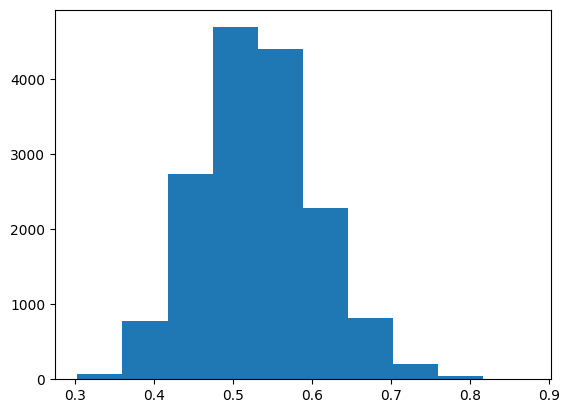

In [131]:
plt.hist(fit['hier_sensitivity_sd'].flatten())

In [96]:
az_summaraz = az.summary(fit_HC)

In [100]:
az_summaraz['r_hat'].mean()

1.0069025542860561

In [4]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_PD = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit_PD['log_lik']


In [5]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
weight_HC = fit_HC["transfer_hier_weight_mu"] 
beta_HC = fit_HC["transfer_hier_sensitivity_mu"]

In [6]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
weight_PD = fit_PD["transfer_hier_weight_mu"] 
beta_PD = fit_PD["transfer_hier_sensitivity_mu"]

NameError: name 'weight_PD' is not defined

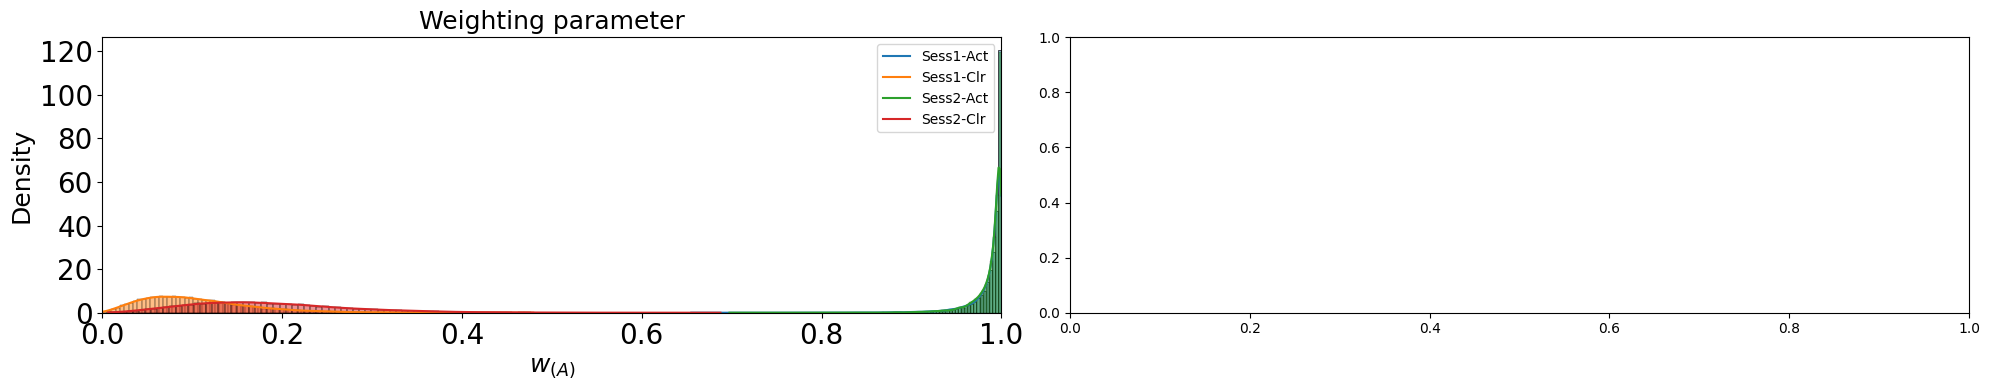

In [73]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight_HC[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(weight_PD[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.xlim(0, 1)

In [66]:
weight_HC = fit["transfer_hier_weight_mu"] 


(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.]),
 [Text(-8.0, 0, '−8'),
  Text(-6.0, 0, '−6'),
  Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6')])

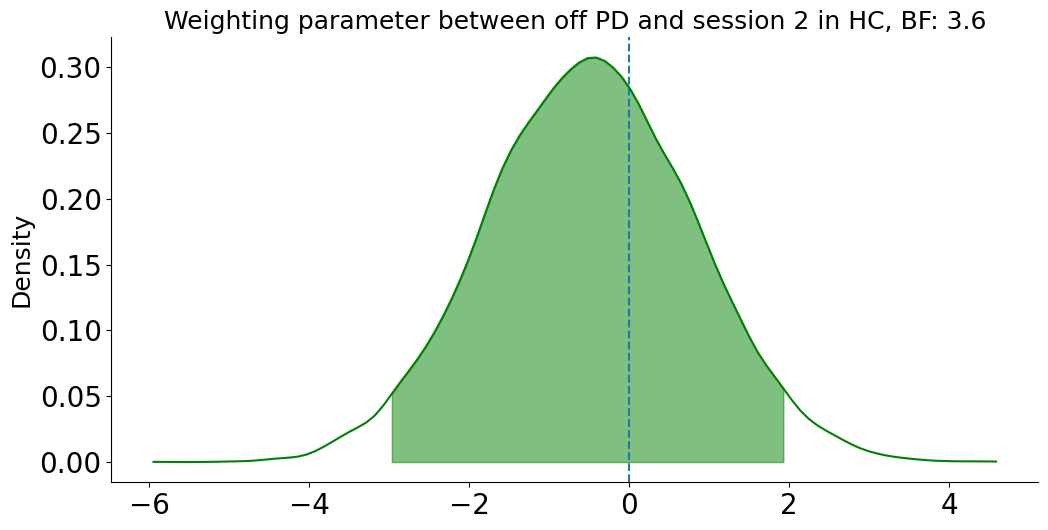

In [78]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight_HC[1,1] - weight_HC[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,1] - weight_HC[0,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between off PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



In [29]:
waic = np.array([21262, 21277, 21396,21298, 21281, 21602])

In [30]:
dwaic = waic -np.min(waic)
weight = np.zeros(len(waic))

In [31]:
weight

array([0., 0., 0., 0., 0., 0.])

In [32]:
for i in range(len(waic)):
   weight[i] = np.exp(-dwaic[i]/2)/np.sum(np.exp(-dwaic/2))

In [33]:
weight

array([9.99372443e-01, 5.52737278e-04, 7.97989326e-30, 1.52204221e-08,
       7.48048561e-05, 1.47796941e-74])

In [18]:
np.sum(np.exp(-dwaic/2))

1.0

In [17]:
dwaic

array([  119,   206,     0, 23924])

In [ ]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
behAll = behAll[behAll['patient']=='HC']
sublist = behAll['sub_ID'].unique()

In [148]:
transfer_weight = fit['transfer_weight']

In [165]:
transfer_alphaClr_pos =  fit['transfer_alphaClr_pos']
transfer_alphaClr_neg =  fit['transfer_alphaClr_neg']

In [177]:
transfer_alphaAct_pos =  fit['transfer_alphaAct_pos']
transfer_alphaAct_neg =  fit['transfer_alphaAct_neg']

In [166]:
transfer_alphaClr_pos.shape

(24, 2, 2, 16000)

<Axes: ylabel='Density'>

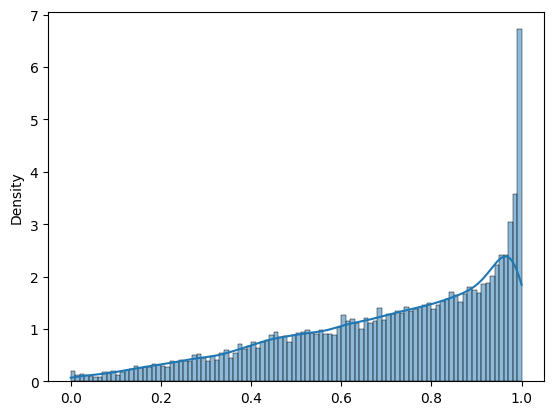

In [ ]:
sns.histplot(transfer_weight[21,1,1,:], kde=True, stat='density', bins=100)

<Axes: ylabel='Density'>

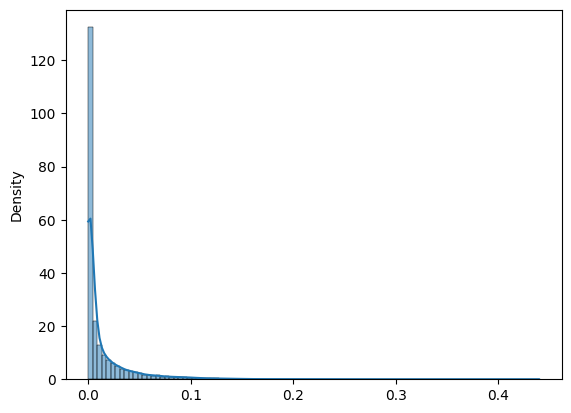

In [179]:
sns.histplot(transfer_alphaAct_neg[21,1,1,:], kde=True, stat='density', bins=100)

<Axes: ylabel='Density'>

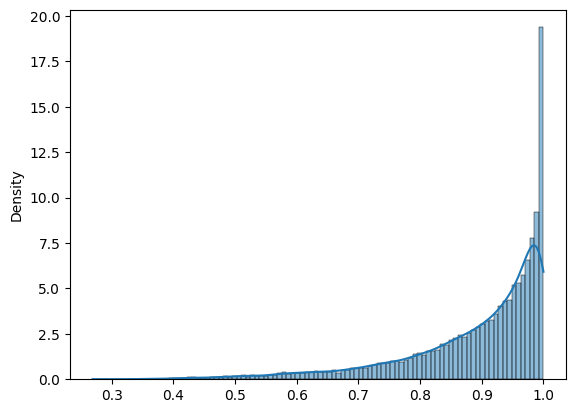

In [164]:
sns.histplot(transfer_weight[21,1,1,:], kde=True, stat='density', bins=100)

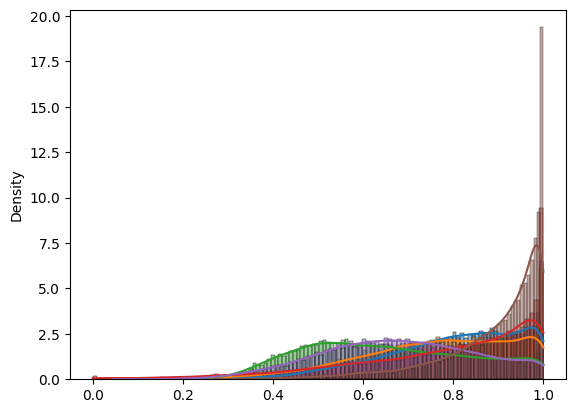

In [157]:
for i in [2,12,13,15,16,21]:
    sns.histplot(transfer_weight[i,1,1,:], kde=True, stat='density', bins=100)

0 sub-004
1 sub-010
2 sub-025
3 sub-029
5 sub-041
6 sub-042
7 sub-045
9 sub-056
12 sub-070
13 sub-071
14 sub-074
15 sub-082
16 sub-085
17 sub-087
18 sub-089
19 sub-092
21 sub-109


(0.0, 1.0)

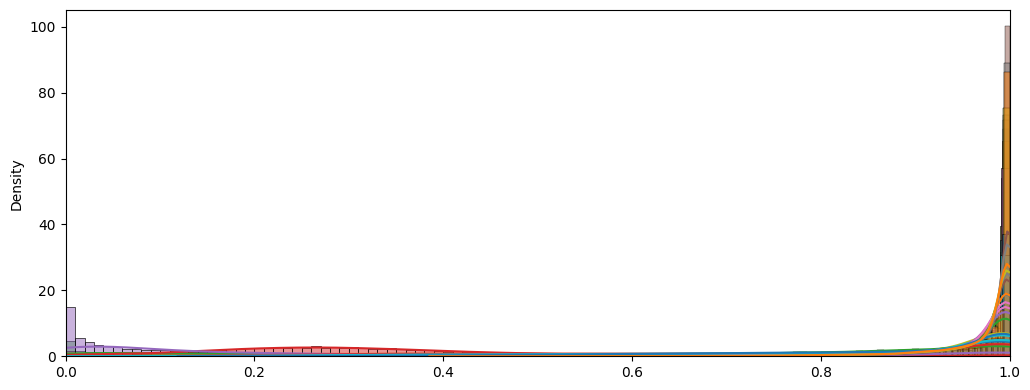

In [56]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,1,0,:], kde=True, stat='density', bins=100)
    if (transfer_weight[i,1,1,:].mean()<.4):
        print(i, sublist[i])
plt.xlim(0, 1)


In [ ]:
offState = ['sub-052', 'sub-056', 'sub-065', 'sub-074', 'sub-108']
OnState = ['sub-040', 'sub-052', 'sub-059', 'sub-108']

In [ ]:
session1 = ['sub-030', 'sub-036', 'sub-069']
session2 = ['sub-030','sub-067' ,'sub-069', 'sub-076', 'sub-077', 'sub-083']

In [8]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
len(subList)

46

In [35]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [36]:
withdraw_subs = ['sub-030','sub-034','sub-067','sub-069','sub-076','sub-077','sub-083']
for sub in withdraw_subs:
    behAll = behAll[behAll['sub_ID']!=sub]

In [39]:
behAll['sub_ID'].unique().shape

(39,)

In [33]:
len(sublist)

39

In [24]:
np.where(subList,'sub-004')

IndexError: arrays used as indices must be of integer (or boolean) type

ValueError: operands could not be broadcast together with shapes (46,) (2,) 

In [88]:
fit_HC['hier_theta_mu'].shape

(1, 6000)

(0.0, 1.0)

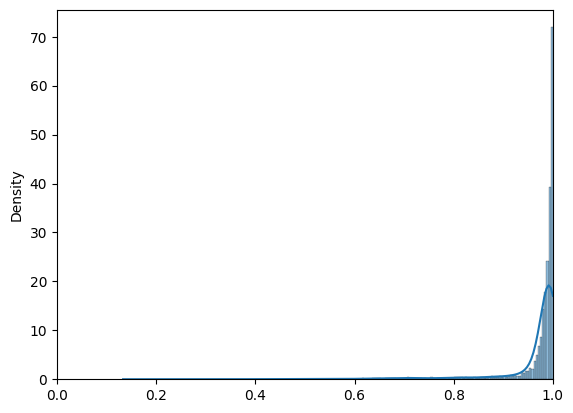

In [89]:
sns.histplot(fit_HC['transfer_hier_theta_mu'][0], kde=True, stat='density', bins=200)
plt.xlim(0, 1)

(0.0, 1.0)

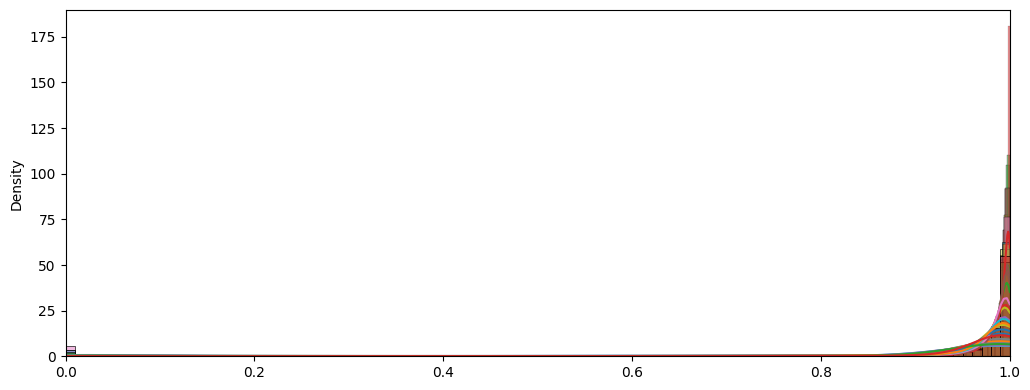

In [80]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(24):
    sns.histplot(fit_HC['transfer_theta'][i], kde=True, stat='density', bins=100)
plt.xlim(0, 1)


In [71]:
prob_model = fit_HC['theta'].mean(axis=1)

In [73]:
np.prod(prob_model/(1-prob_model))

56531.43826782085

In [72]:
prob_model/(1-prob_model)

array([ 0.2583986 ,  0.3231887 , 13.95124946,  3.70075626,  2.34345122,
       12.51256707,  0.18175456,  0.65534485,  3.76768923,  0.30965171,
        1.45494709,  0.3506772 ,  7.81416725, 21.35630552,  0.29191698,
       13.57096519,  3.80300908,  0.63555351,  1.33233065,  2.98053135,
        1.2795674 ,  2.03062108,  0.40161473,  0.95238703])

In [76]:
np.sum(prob_model>.5)

14

In [92]:
fit_HC['transfer_hier_theta_mu'].mean()/(1-fit_HC['transfer_hier_theta_mu'].mean())

25.633997657473927

In [93]:
fit_HC['transfer_hier_theta_mu'].mean()

0.9624540028552798

In [142]:
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
behAll_subject = behAll[(behAll['sub_ID']=='sub-030')&(behAll['block']=='Stim')]

In [143]:
expected_value_push = np.array(behAll_subject['pushCorrect'])
expected_value_pull = np.array((1-behAll_subject['pushCorrect']))
expected_value_yellow =np.array(behAll_subject['yellowCorrect'])
expected_value_blue =np.array((1-behAll_subject['yellowCorrect']))

In [145]:
stats.pearsonr(expected_value_push, expected_value_blue)

PearsonRResult(statistic=-0.02489190025638505, pvalue=0.7719702032785527)

In [ ]:
leftCanBePushed = np.array(behAll_subject['leftCanBePushed                '])
yellowOnLeftSide = np.array(behAll_subject['yellowOnLeftSide'])

winAmtPushable = np.array(behAll_subject['winAmtPushable'])
winAmtPullable = np.array(behAll_subject['winAmtPullable'])
winAmtYellow = np.array(behAll_subject['winAmtYellow'])
winAmtBlue = np.array(behAll_subject['winAmtBlue'])


In [ ]:
expected_value_push = np.array(behAll_subject['pushCorrect']*behAll_subject['winAmtPushable'])
expected_value_pull = np.array((1-behAll_subject['pushCorrect'])*behAll_subject['winAmtPullable'])
expected_value_yellow =np.array(behAll_subject['yellowCorrect']*behAll_subject['winAmtYellow'])
expected_value_blue =np.array((1-behAll_subject['yellowCorrect'])*behAll_subject['winAmtBlue'])

In [ ]:
push1_list = []
blue1_list = []
push2_list = []
yell2_list = []
for i in range(len(behAll_subject)):
    if leftCanBePushed[i] == yellowOnLeftSide[i]:
        push1_list.append(winAmtPushable[i])
        blue1_list.append(winAmtBlue[i])
    else:
        push2_list.append(winAmtPushable[i])
        yell2_list.append(winAmtYellow[i])

In [ ]:
stats.pearsonr(push1_list, blue1_list)

ValueError: x and y must have the same length.

In [127]:
behAll_subject.columns

Index(['session', 'run', 'stimActFirst', 'block', 'stimActBlock',
       'trialNumber', 'stimOnset', 'yellowOnLeftSide',
       'leftCanBePushed                ', 'winAmtLeft', 'winAmtRight',
       'winAmtYellow', 'winAmtBlue', 'winAmtPushable', 'winAmtPullable', 'RT',
       'actUsrResp                ', 'invalResp', 'yellowChosen', 'leftChosen',
       'pushed', 'endOfMoveTime', 'decFBjitOnset                ', 'FBOnset',
       'yellowCorrect', 'pushCorrect', 'correctChoice',
       'wonAmount                ', 'totalAmount', 'ITIOnset', 'reverse',
       'phase', 'sub_ID', 'group', 'patient'],
      dtype='object')

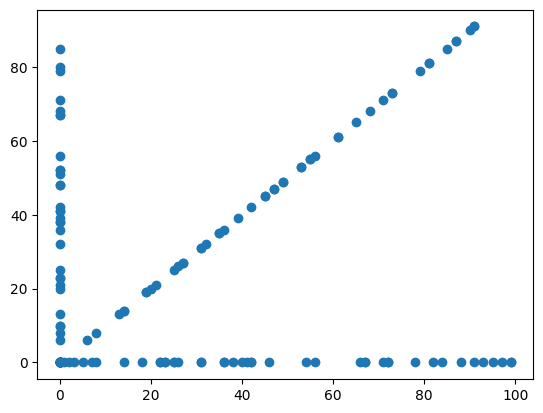

In [128]:
plt.scatter(expected_value_push, expected_value_yellow)

In [129]:
expected_value_push = np.array(behAll_subject['pushCorrect']*behAll_subject['winAmtPushable'])
expected_value_pull = np.array((1-behAll_subject['pushCorrect'])*behAll_subject['winAmtPullable'])
expected_value_yellow =np.array(behAll_subject['yellowCorrect']*behAll_subject['winAmtYellow'])
expected_value_blue =np.array((1-behAll_subject['yellowCorrect'])*behAll_subject['winAmtBlue'])

In [130]:
stats.pearsonr(behAll_subject['winAmtPushable'].to_numpy(), behAll_subject['winAmtYellow'].to_numpy())

PearsonRResult(statistic=-0.033970860587263646, pvalue=0.6757618614518867)

In [125]:
stats.pearsonr(expected_value_push, expected_value_pull)

PearsonRResult(statistic=-0.5696701190628848, pvalue=1.5343835600069503e-14)

In [119]:
behAll_subject['winAmtPullable'].to_numpy()

array([44, 73, 68, 94, 48, 27, 18, 68, 13, 39, 52, 20, 41, 66,  1, 10, 25,
       34, 85, 87, 59, 85, 75, 29, 92, 39,  8, 82, 78, 97, 46, 71, 78, 36,
       64, 46,  7, 67, 95,  9, 98, 74, 98, 21, 53, 60, 47, 81, 65, 69, 86,
        9, 21, 28, 40, 51, 16, 23, 58, 51, 86, 55, 33, 12, 45, 58,  7, 16,
       35, 69, 77, 62, 19, 38, 74, 12, 56, 73, 32,  6, 48,  6, 27, 82, 10,
       32, 13, 61, 52,  3, 80, 99, 41, 34,  1, 10, 75, 34, 13, 41, 15, 75,
       71,  8, 39, 92, 18, 78,  3, 54, 29, 22, 80, 64, 44, 64, 54, 93, 67,
        5, 91, 98, 26,  2, 79, 53, 60, 47, 81,  5, 65, 69, 86,  9, 79, 28,
       60, 16, 23, 42, 51, 14, 55, 33, 88, 45, 58, 84, 69, 77, 38, 19, 38])

In [133]:
leftCanBePushed = np.array(behAll_subject['leftCanBePushed                '])
yellowOnLeftSide = np.array(behAll_subject['yellowOnLeftSide'])

In [ ]:
# Probability of irrelavant options


In [321]:
# read collected data across data
rawBehAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/rawBehAll.csv')

In [352]:
# mean across features
rawBehAll_mean = rawBehAll.groupby(['sub_ID', 'session', 'run', 'reverse', 'block', 'phase'], as_index=False)[['pushCorrect', 'yellowCorrect']].mean()
# correlation across features
rawBehAll_corr = rawBehAll.groupby(['sub_ID', 'session', 'run', 'reverse', 'block', 'phase'], as_index=False).apply(lambda g: g['pushCorrect'].corr(g['yellowCorrect']))

/home/amingk/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/amingk/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_1014082/1410525370.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rawBehAll_corr = rawBehAll.groupby(['sub_ID', 'session', 'run', 'reverse', 'block', 'phase'], as_index=False).apply(lambda g: g['pushCorrect'].corr(g['yellowCorrect']))


In [350]:
rawBehAll_mean[0:50]

,sub_ID,session,run,reverse,block,phase,pushCorrect,yellowCorrect
0,sub-004,1,1,14.0,Act,phase1,0.357143,0.500000
1,sub-004,1,1,14.0,Act,phase2,0.714286,0.571429
2,sub-004,1,1,14.0,Act,phase3,0.357143,0.357143
3,sub-004,1,1,21.0,Stim,phase1,0.714286,0.714286
4,sub-004,1,1,21.0,Stim,phase2,0.238095,0.333333
5,sub-004,1,2,14.0,Stim,phase1,0.642857,0.357143
6,sub-004,1,2,14.0,Stim,phase2,0.500000,0.714286
7,sub-004,1,2,14.0,Stim,phase3,0.714286,0.357143
8,sub-004,1,2,21.0,Act,phase1,0.714286,0.428571
9,sub-004,1,2,21.0,Act,phase2,0.333333,0.523810


In [351]:
rawBehAll_corr[50:100]

,sub_ID,session,run,reverse,block,None
50,sub-030,1,2,14.0,Act,-4.128614e-02
51,sub-030,1,2,14.0,Stim,9.534626e-02
52,sub-030,2,1,21.0,Act,-2.337367e-01
53,sub-030,2,1,21.0,Stim,2.034988e-01
54,sub-030,2,2,14.0,Act,1.587834e-17
55,sub-030,2,2,14.0,Stim,-4.561030e-03
56,sub-033,1,1,21.0,Act,2.363636e-01
57,sub-033,1,1,21.0,Stim,2.860388e-01
58,sub-033,1,2,14.0,Act,-9.122060e-02
59,sub-033,1,2,14.0,Stim,-2.827839e-01


In [6]:
stats.norm.cdf([.4, .5, .6,  .7, .8, .9, 1, 1.2, 1.3, 1.5])

array([0.65542174, 0.69146246, 0.72574688, 0.75803635, 0.7881446 ,
       0.81593987, 0.84134475, 0.88493033, 0.90319952, 0.9331928 ])

In [105]:
# grand truth of mean paramaters for each parameter
weight_Act = np.array([.4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5])
weight_Clr = np.array([-.4, -.5, -.6,  -.7, -.8, -.9, -1, -1.1, -1.2, -1.3, -1.4, -1.5])
learning_rate = np.array([-1.6, -1.3, -1, -.7, -.6, -.3, 0, .3, .6 , .9, 1.2, 1.5])
sensitivity = np.array([-5, -4.8, -4.6, -4.2, -4, -3.8, -3.6, -3.4, -3.2 , -3, -2.8, -2.6])

# grand truth of sd paramaters for each parameter
alpha_sd = np.array([.1, .2, .3, .4, .5, .6, .7,  .8, .9, 1, 1.1, 1.2])
weight_sd = np.array([.1, .2, .3, .4, .5, .6, .7,  .8, .9, 1, 1.1, 1.2])
sensitivity_sd = np.array([.1, .2, .3, .4, .5, .6, .7,  .8, .9, 1, 1.1, 1.2])


In [106]:
# Shuffle mean
weight_Act = np.random.choice(weight_Act, replace=False, size=12)
weight_Clr = np.random.choice(weight_Clr, replace=False, size=12)
sensitivity = np.random.choice(sensitivity, replace=False, size=12)
 
alphaAct_pos_mu = np.random.choice(learning_rate, replace=False, size=12)
alphaAct_neg_mu = np.random.choice(learning_rate, replace=False, size=12)
alphaClr_pos_mu = np.random.choice(learning_rate, replace=False, size=12)
alphaClr_neg_mu = np.random.choice(learning_rate, replace=False, size=12)

# Shuffle mean
alpha_sd = np.random.choice(alpha_sd, replace=False, size=12)
weight_sd = np.random.choice(weight_sd, replace=False, size=12)
sensitivity_sd = np.random.choice(sensitivity_sd, replace=False, size=12)

In [107]:
# number of simulation
i = 5

# mean
hier_weight_mu = np.array([[weight_Act[2*i], weight_Clr[2*i]], [weight_Act[2*i+1],weight_Clr[2*i+1]]])
hier_alphaAct_pos_mu = np.array([[alphaAct_pos_mu[2*i], -3], [alphaAct_pos_mu[2*i+1], -3]])
hier_alphaAct_neg_mu =  np.array([[alphaAct_neg_mu[2*i], -3], [alphaAct_neg_mu[2*i+1],-3]])
hier_alphaClr_pos_mu = np.array([[-3, alphaClr_pos_mu[2*i]], [-3,alphaClr_pos_mu[2*i+1]]])
hier_alphaClr_neg_mu = np.array([[-3, alphaClr_neg_mu[2*i]], [-3,alphaClr_neg_mu[2*i+1]]])
hier_sensitivity_mu = np.array([[sensitivity[2*i], sensitivity[2*i]], [sensitivity[2*i+1],sensitivity[2*i+1]]])


# sd
hier_alpha_sd = alpha_sd[2*i]
hier_weight_sd = weight_sd[2*i]
hier_sensitivity_sd = sensitivity_sd[2*i]

In [108]:
hier_weight_mu

array([[ 1.5, -1.1],
       [ 0.9, -0.4]])

In [109]:
hier_alphaAct_pos_mu

array([[ 0.6, -3. ],
       [-0.3, -3. ]])

In [110]:
hier_alphaAct_neg_mu

array([[ 0. , -3. ],
       [-0.7, -3. ]])

In [111]:
hier_alphaClr_pos_mu

array([[-3. ,  1.5],
       [-3. ,  0.9]])

In [113]:
hier_sensitivity_mu 

array([[-4. , -4. ],
       [-3.6, -3.6]])

In [114]:
hier_alpha_sd

0.2

In [115]:
hier_weight_sd

0.7

In [116]:
hier_sensitivity_sd

0.8